In [1]:
import random
import copy
import logging
import sys

# from run_tests_201204 import *

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns

script_n = 'plot_210629_snr_learned2'

data_script = 'batch_210627_snr'
db_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/' \
            f'{data_script}/'


scaled_noise = 0
core_noise = 0
n_mfs = 497
n_grcs = 1847

pattern_type = 'binary'
db = {}

zmargin = 10000
sub = 0

# for model in ['observed', 'local_random', 'global_random']:
for model in ['observed']:
    for scale in [.5, 1.0]:
        for learned in [0, 1]:
            model_name = f'{model}_{scale}_learned_{learned}'
            db[model_name] = compress_pickle.load(
                db_path + \
                    f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_'
                    f'zmargin_{zmargin}_'
                    f'scale_{scale}_'
                    f'learned_{learned}_'
                    f'sub_{sub}_'
                    f'0.3_512_40.gz')


In [2]:
db.keys()

dict_keys(['observed_0.5_learned_0', 'observed_0.5_learned_1', 'observed_1.0_learned_0', 'observed_1.0_learned_1'])

In [4]:

dbb = db['observed_0.5_learned_0'][0]
baseline_hd_norm2 = defaultdict(int)
for try_n in dbb:
    for noise in try_n:
        baseline_hd_norm2[noise] += try_n[noise]['hamming_distance']
for k in baseline_hd_norm2:
    baseline_hd_norm2[k] /= len(dbb)
    baseline_hd_norm2[k] /= f_stdev[model_name]*2
# print(s/len(dbb))

In [5]:
baseline_hd_norm2

defaultdict(int,
            {0.05: 0.4447513209069635,
             0.1: 0.8679372721580594,
             0.15: 1.2730212144301516,
             0.2: 1.6613331651997751,
             0.25: 2.0331062701281213,
             0.3: 2.3895787380375784,
             0.35: 2.7415417098163295,
             0.4: 3.069725032162202,
             0.45: 3.3858077322896767,
             0.5: 3.6905411915524384,
             0.55: 3.985128586523264,
             0.6: 4.267768776368808,
             0.65: 4.542782807877051,
             0.7: 4.815767384925186,
             0.75: 5.072072987133606,
             0.8: 5.320868399831019,
             0.85: 5.562320328205218,
             0.9: 5.796638965753856,
             0.95: 6.025554180802455,
             1.0: 6.2567332039809616})

Height: 3.7593984962406015, Aspect: 1.33


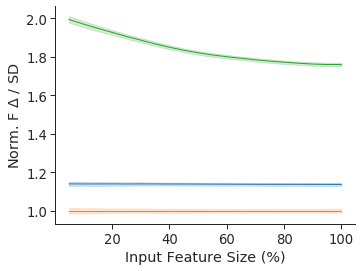

In [8]:

name_map = {
        'observed_1.0': "Observed",
        'observed_0.5': "w/ half GrC-PC conn.",
}

palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
}

f_means = {
    'observed_1.0_learned_0': n_grcs*.3,
    'observed_0.5_learned_0': n_grcs*.3*.5,
    'observed_0.5_learned_1': n_grcs*.3*.5,
}

f_stdev = {
    'observed_1.0_learned_0': n_grcs*.3*.06458186634652402,
    'observed_0.5_learned_0': n_grcs*.3*.5*0.07294774458805967,
    'observed_0.5_learned_1': n_grcs*.3*.5*0.07294774458805967,
}

mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
        'observed_1.0_learned_0',
        'observed_0.5_learned_0',
        'observed_0.5_learned_1',
#         'observed_1.0',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
#             if noise >= 1:
#                 continue
#             if noise >= .85:
#                 continue
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
#                 model=name_map[model_name],
                model=model_name,
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                hamming_distance_norm=res['hamming_distance']/f_means[model_name]/2,
                hamming_distance_norm2=res['hamming_distance']/f_stdev[model_name]/2,
                hamming_distance_norm3=res['hamming_distance']/f_stdev[model_name]/2/baseline_hd_norm2[noise],
                normalized_mse=res['normalized_mse'],
#                 grc_stdev_pct=1/res['grc_stdev_pct'],
                grc_stdev_pct=res['grc_stdev_pct'],
                grc_stdev_pct_norm=res['grc_stdev_pct'] / .0735,
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='hamming_distance_norm3',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
#     ylim=[0, None],
    y_axis_label='Norm. F $\Delta$ / SD',
    x_axis_label='Input Feature Size (%)',
#     title='noise',
    legend=None,
    save_filename=f'{script_n}_1559.svg',
    show=True,
    )


Height: 3.7593984962406015, Aspect: 1.33


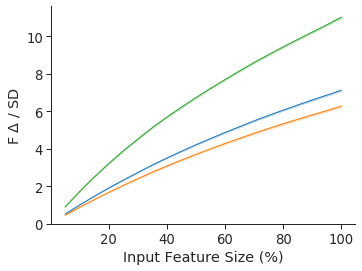

In [7]:

name_map = {
        'observed_1.0': "Observed",
        'observed_0.5': "w/ half GrC-PC conn.",
}

palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
}

f_means = {
    'observed_1.0_learned_0': n_grcs*.3,
    'observed_0.5_learned_0': n_grcs*.3*.5,
    'observed_0.5_learned_1': n_grcs*.3*.5,
}

f_stdev = {
    'observed_1.0_learned_0': n_grcs*.3*.06458186634652402,
    'observed_0.5_learned_0': n_grcs*.3*.5*0.07294774458805967,
    'observed_0.5_learned_1': n_grcs*.3*.5*0.07294774458805967,
}

mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
        'observed_1.0_learned_0',
        'observed_0.5_learned_0',
        'observed_0.5_learned_1',
#         'observed_1.0',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
#             if noise >= 1:
#                 continue
#             if noise >= .85:
#                 continue
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
#                 model=name_map[model_name],
                model=model_name,
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                hamming_distance_norm=res['hamming_distance']/f_means[model_name]/2,
                hamming_distance_norm2=res['hamming_distance']/f_stdev[model_name]/2,
                normalized_mse=res['normalized_mse'],
#                 grc_stdev_pct=1/res['grc_stdev_pct'],
                grc_stdev_pct=res['grc_stdev_pct'],
                grc_stdev_pct_norm=res['grc_stdev_pct'] / .0735,
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='hamming_distance_norm2',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
    ylim=[0, None],
    y_axis_label='F $\Delta$ / SD',
    x_axis_label='Input Feature Size (%)',
#     title='noise',
    legend=None,
    save_filename=f'{script_n}_1529.svg',
    show=True,
    )


Height: 3.7593984962406015, Aspect: 1.33


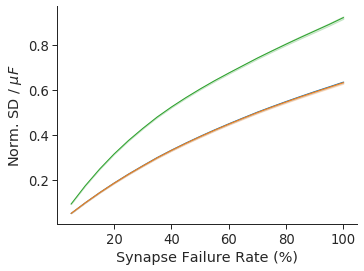

In [11]:

name_map = {
        'observed_1.0': "Observed",
        'observed_0.5': "w/ half GrC-PC conn.",
}

palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
}

f_means = {
    'observed_1.0_learned_0': n_grcs*.3,
    'observed_0.5_learned_0': n_grcs*.3*.5,
    'observed_0.5_learned_1': n_grcs*.3*.5,
}

mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
        'observed_1.0_learned_0',
        'observed_0.5_learned_0',
        'observed_0.5_learned_1',
#         'observed_1.0',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
#             if noise >= 1:
#                 continue
#             if noise >= .85:
#                 continue
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
#                 model=name_map[model_name],
                model=model_name,
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                hamming_distance_norm=res['hamming_distance']/f_means[model_name]/2,
                normalized_mse=res['normalized_mse'],
#                 grc_stdev_pct=1/res['grc_stdev_pct'],
                grc_stdev_pct=res['grc_stdev_pct'],
                grc_stdev_pct_norm=res['grc_stdev_pct'] / .0735,
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='hamming_distance_norm',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
#     ylim=[0, None],
    y_axis_label='Norm. SD / $\mu F$',
    x_axis_label='Synapse Failure Rate (%)',
#     title='noise',
    legend=None,
    save_filename=f'{script_n}_1529.svg',
    show=True,
    )
